## Entity-Wise Sentiment Analysis

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk

# Download stopwords if not already downloaded
# nltk.download('stopwords')

In [2]:
def wrangle(df_path):
    
    column_names = ["iD", "entity", "sentiment", "text"]
    df = pd.read_csv(df_path,names=column_names)

    df = pd.read_csv("twitter_training.csv",names=column_names) # Reading csv file
    df= df.dropna()   # Drop rows with any missing values
    df= df.drop_duplicates()  # Drop duplicate rows
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    df['text'] = df['text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
    return(df)

In [3]:
df = wrangle("twitter_training.csv")
df.head()

,iD,entity,sentiment,text
0,2401,Borderlands,Positive,"im getting borderlands murder ,"
1,2401,Borderlands,Positive,"I coming borders I kill all,"
2,2401,Borderlands,Positive,"im getting borderlands kill all,"
3,2401,Borderlands,Positive,"im coming borderlands murder all,"
4,2401,Borderlands,Positive,"im getting borderlands 2 murder all,"


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(df['text'])

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
print(tfidf_df.head())


   2020       all  also  amazon  and  back  bad  ban  battlefield   be  ...  \
0   0.0  0.000000   0.0     0.0  0.0   0.0  0.0  0.0          0.0  0.0  ...   
1   0.0  1.000000   0.0     0.0  0.0   0.0  0.0  0.0          0.0  0.0  ...   
2   0.0  0.696016   0.0     0.0  0.0   0.0  0.0  0.0          0.0  0.0  ...   
3   0.0  0.696016   0.0     0.0  0.0   0.0  0.0  0.0          0.0  0.0  ...   
4   0.0  0.696016   0.0     0.0  0.0   0.0  0.0  0.0          0.0  0.0  ...   

   video  wait  want   we  what  world  would  xbox  year  you  
0    0.0   0.0   0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0  
1    0.0   0.0   0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0  
2    0.0   0.0   0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0  
3    0.0   0.0   0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0  
4    0.0   0.0   0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0  

[5 rows x 100 columns]


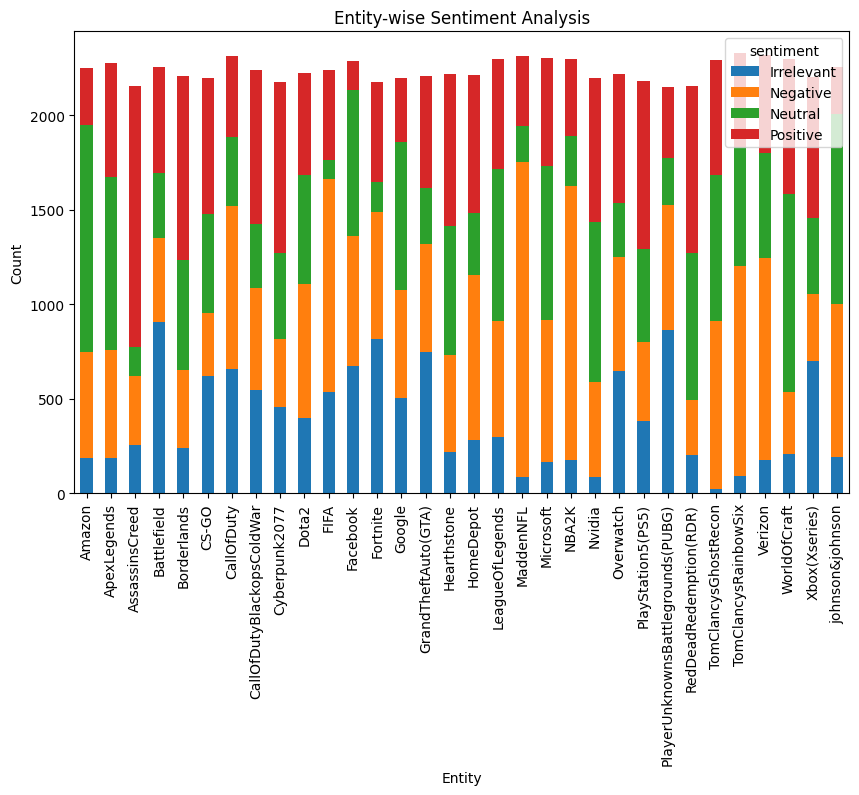

In [5]:
# Group by 'entity' and 'sentiment'
entity_sentiment = df.groupby(['entity', 'sentiment']).size().unstack().fillna(0)
entity_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Entity-wise Sentiment Analysis')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.show()



The key insights key from insights the from entity the- entitywise- sentiment

1. **Sentiment **Sentiment Distribution**: Distribution**: The The plot plot shows shows the the distribution distribution of of sentiments sentiments (Positive, (Positive, Neutral, Neutral, Negative, Negative, Irre

2. **Entities with High Positive Sentiment**: Entities like `AssassinsCreed`, `RedDeadRedemption(RDR)`, and `Borderlands` have a high count of positive sentiments, indicating a satisfaction. 

3. **Entities with High Negative Sentiment**: Entities like `FIFA`, `NBA2K`, and `MaddenNFL` have a high count of negative sentiments, suggesting dissatisfaction

4. **Entities with High Neutral Sentiment**: Entities like `WorldOfCraft` and `johnson&johnson` have a high count of neutral sentiments, indicating a balanced

5. **Entities with High Irrelevant Sentiment**: Entities like `CallOfDuty`, `PlayerUnknownsBattlegrounds(PUBG)`, and `Verizon` have a significant count of irrelevant sentiments, which might indicate off-topic discussions

6. **Overall Sentiment Trends**: The plot provides a comparative view of how different entities are perceived in terms of sentiment, helping to identify trends and

These insights can be used to inform marketing strategies, product improvements, and customer engagement efforts.
 patterns
These in insights public can opinion. be used to inform marketing strategies, product improvements, and customer engagement efforts.

6. **Overall Sentiment Trends**: The plot provides a comparative view of how different entities are perceived in terms of sentiment, helping to identify trends and patterns in public opinion. or noise in the data.
 or
5. indifferent **Entities perception with among High users. Irrelevant Sentiment**: Entities like `CallOfDuty`, `PlayerUnknownsBattlegrounds(PUBG)`, and `Verizon` have a significant count of irrelevant sentiments, which might indicate off-topic discussions or noise in the data.

4. **Entities with High Neutral Sentiment**: Entities like `WorldOfCraft` and `johnson&johnson` have a high count of neutral sentiments, indicating a balanced or indifferent perception among users. or negative experiences among users.

3. **Entities with High Negative Sentiment**: Entities like `FIFA`, `NBA2K`, and `MaddenNFL` have a high count of negative sentiments, suggesting dissatisfaction or negative experiences among users. favorable perception among users.

2. **Entities with High Positive Sentiment**: Entities like `AssassinsCreed`, `RedDeadRedemption(RDR)`, and `Borderlands` have a high count of positive sentiments, indicating a favorable perception among users.levant) Irrelevant) for for each each entity. entity. This This helps helps in in understanding how understanding different how entities different are entities perceived are by perceived the by public. the public.wise analysis sentiment plot analysis are plot as are follows: as follows: